In [27]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# load dataset
pima = pd.read_csv("speedDating_trab.csv")

pima


,Unnamed: 0,id,partner,age,age_o,goal,date,go_out,int_corr,length,met,like,prob,match
0,1,1.0,1,21.0,27.0,2.0,7.0,1.0,0.14,2.0,1.0,7.0,6.0,0
1,2,1.0,2,21.0,22.0,2.0,7.0,1.0,0.54,2.0,1.0,7.0,5.0,0
2,3,1.0,3,21.0,22.0,2.0,7.0,1.0,0.16,2.0,1.0,7.0,NaN,1
3,4,1.0,4,21.0,23.0,2.0,7.0,1.0,0.61,2.0,1.0,7.0,6.0,1
4,5,1.0,5,21.0,24.0,2.0,7.0,1.0,0.21,2.0,1.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8374,22.0,18,25.0,26.0,1.0,2.0,1.0,0.64,1.0,0.0,2.0,5.0,0
8374,8375,22.0,19,25.0,24.0,1.0,2.0,1.0,0.71,1.0,0.0,4.0,4.0,0
8375,8376,22.0,20,25.0,29.0,1.0,2.0,1.0,-0.46,1.0,0.0,6.0,5.0,0
8376,8377,22.0,21,25.0,22.0,1.0,2.0,1.0,0.62,1.0,0.0,5.0,5.0,0


In [28]:
pima.isnull().sum()


Unnamed: 0      0
id              1
partner         0
age            95
age_o         104
goal           79
date           97
go_out         79
int_corr      158
length        915
met           375
like          240
prob          309
match           0
dtype: int64

In [29]:
#tds os nans de tds as colunas menos o int_corr vamos preencher com a moda
#o int_corr preenchemos com a media

gf= pima['prob'].mode()[0]
pima['prob'].fillna(value=gf,inplace=True)

gf= pima['like'].mode()[0]
pima['like'].fillna(value=gf,inplace=True)

gf= pima['met'].mode()[0]
pima['met'].fillna(value=gf,inplace=True)

gf= pima['length'].mode()[0]
pima['length'].fillna(value=gf,inplace=True)

gf= pima['int_corr'].mean()
pima['int_corr'].fillna(value=gf,inplace=True)

gf= pima['go_out'].mode()[0]
pima['go_out'].fillna(value=gf,inplace=True)

gf= pima['date'].mode()[0]
pima['date'].fillna(value=gf,inplace=True)

gf= pima['goal'].mode()[0]
pima['goal'].fillna(value=gf,inplace=True)

gf= pima['age_o'].mode()[0]
pima['age_o'].fillna(value=gf,inplace=True)

gf= pima['age'].mode()[0]
pima['age'].fillna(value=gf,inplace=True)

#gf= pima['id'].mode()[0]
#pima['id'].fillna(value=gf,inplace=True)
pima.dropna(subset=['id'],inplace=True )

#index = pima[pima['id']==pima['partner']].index
#pima.drop(index, inplace=True)

#if pima['id'].equals(pima['partner']):
#    pima.dropna(subset=['id','patner'],inplace=True )


In [30]:
#convertemos de float para int
pima[['prob','like','met','length','go_out','date','goal','age_o','age','id']]=  pima[['prob','like','met','length','go_out','date','goal','age_o','age','id']].astype(int)

pima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8377 entries, 0 to 8376
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8377 non-null   int64  
 1   id          8377 non-null   int64  
 2   partner     8377 non-null   int64  
 3   age         8377 non-null   int64  
 4   age_o       8377 non-null   int64  
 5   goal        8377 non-null   int64  
 6   date        8377 non-null   int64  
 7   go_out      8377 non-null   int64  
 8   int_corr    8377 non-null   float64
 9   length      8377 non-null   int64  
 10  met         8377 non-null   int64  
 11  like        8377 non-null   int64  
 12  prob        8377 non-null   int64  
 13  match       8377 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 981.7 KB


In [31]:
#numero de 1's
print("% 1's:",pima['match'].mean())
print("% 0's:", 1-pima['match'].mean())


% 1's: 0.16473677927659067
% 0's: 0.8352632207234093


In [32]:
pima.head(10)


,Unnamed: 0,id,partner,age,age_o,goal,date,go_out,int_corr,length,met,like,prob,match
0,1,1,1,21,27,2,7,1,0.14,2,1,7,6,0
1,2,1,2,21,22,2,7,1,0.54,2,1,7,5,0
2,3,1,3,21,22,2,7,1,0.16,2,1,7,5,1
3,4,1,4,21,23,2,7,1,0.61,2,1,7,6,1
4,5,1,5,21,24,2,7,1,0.21,2,1,6,6,1
5,6,1,6,21,25,2,7,1,0.25,2,1,6,5,0
6,7,1,7,21,30,2,7,1,0.34,2,1,6,5,0
7,8,1,8,21,27,2,7,1,0.50,2,0,6,7,0
8,9,1,9,21,28,2,7,1,0.28,2,1,7,7,1
9,10,1,10,21,24,2,7,1,-0.36,2,1,6,6,0


In [33]:
pima = pima.drop('int_corr',1)

#divisao do casos em q tem match e os q n tem match
resultados = pima['match']
dados = pima.drop(['match'],axis=1)


# Split dataset into training set and test set (30%/70%)
dados_treino, dados_teste, resultados_treino, resultados_teste= train_test_split( dados, resultados, test_size=0.3,random_state=1)

In [34]:
#ID3 COM ENTROPIA
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(dados_treino, resultados_treino)

#Predict the response for test dataset
predicted_test = clf.predict(dados_teste)

In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(resultados_teste, predicted_test))

#print("Mean Absolute Error:",mae(resultados_teste,clf.predict(dados_teste)))

#print("Mean Squared Error:",mse(resultados_teste,clf.predict(dados_teste),squared=False))

print("Matriz de confusão:\n",confusion_matrix(resultados_teste, clf.predict(dados_teste)))

print(classification_report(resultados_teste, clf.predict(dados_teste)))


Accuracy: 0.7915672235481305
Matriz de confusão:
 [[1851  258]
 [ 266  139]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2109
           1       0.35      0.34      0.35       405

    accuracy                           0.79      2514
   macro avg       0.61      0.61      0.61      2514
weighted avg       0.79      0.79      0.79      2514



In [36]:
kf = KFold(n_splits=7,shuffle=False)
kf.split(dados)

scores=cross_val_score(DecisionTreeClassifier(), dados, resultados, cv=14, scoring='accuracy')
print("Cross Validation:", scores)
print("The mean value for K-fold cross validation test that best explains our model is {}".format(scores.mean()),"\n")

# Initialize the array to zero which will store the confusion matrix
array = [[0,0],[0,0]]
print("MATRIZ DE CONFUSÃO DE CADA K-FOLD:")
# For each train-test split: train, predict and compute the confusion matrix
for train_index, test_index in kf.split(dados):
    # Train test split
    dados_treino, dados_teste = dados.iloc[train_index], dados.iloc[test_index]
    resultados_treino, resultados_teste = resultados.iloc[train_index], resultados.iloc[test_index]
    # Train the model
    model = clf.fit(dados_treino, resultados_treino)
    # Calculate the confusion matrix
    score=confusion_matrix(resultados_teste, model.predict(dados_teste))
    print(score )
    c = score
    # Add the score to the previous confusion matrix of previous model
    array = array + c
print("\n SOMA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:\n",array,"\n")

Cross Validation: [0.72954925 0.70784641 0.66277129 0.58263773 0.67111853 0.73076923
 0.73913043 0.7541806  0.77257525 0.78762542 0.72742475 0.61705686
 0.69565217 0.7826087 ]
The mean value for K-fold cross validation test that best explains our model is 0.7114961869081053 

MATRIZ DE CONFUSÃO DE CADA K-FOLD:
[[678 334]
 [ 93  92]]
[[849 107]
 [180  61]]
[[817 184]
 [128  68]]
[[831 201]
 [103  62]]
[[811 175]
 [129  82]]
[[774 222]
 [139  61]]
[[888 126]
 [132  50]]

 SOMA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:
 [[5648 1349]
 [ 904  476]] 



In [37]:
#NAIVE BAYES
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(dados_treino,resultados_treino)

#Predict the response for test dataset
predicted3 = gnb.predict(dados_teste)
print("Accuracy:",metrics.accuracy_score(resultados_teste, predicted3))


#print("Mean Absolute Error:",mae(resultados_teste,gnb.predict(dados_teste)))

#print("Mean Squared Error:",mse(resultados_teste,gnb.predict(dados_teste),squared=False))

print("Matriz de confusão:\n",confusion_matrix(resultados_teste, gnb.predict(dados_teste)))

print(classification_report(resultados_teste,gnb.predict(dados_teste)))


Accuracy: 0.8520066889632107
Matriz de confusão:
 [[990  24]
 [153  29]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1014
           1       0.55      0.16      0.25       182

    accuracy                           0.85      1196
   macro avg       0.71      0.57      0.58      1196
weighted avg       0.82      0.85      0.82      1196



In [38]:
kf = KFold(n_splits=7,shuffle=False)
kf.split(dados)

scores=cross_val_score(GaussianNB(), dados, resultados, cv=14, scoring='accuracy')
print("Cross Validation:", scores)
print("The mean value for K-fold cross validation test that best explains our model is {}".format(scores.mean()),"\n")

# Initialize the array to zero which will store the confusion matrix
array = [[0,0],[0,0]]
print("MATRIZ DE CONFUSÃO DE CADA K-FOLD:")
# For each train-test split: train, predict and compute the confusion matrix
for train_index, test_index in kf.split(dados):
    # Train test split
    dados_treino, dados_teste = dados.iloc[train_index], dados.iloc[test_index]
    resultados_treino, resultados_teste = resultados.iloc[train_index], resultados.iloc[test_index]
    # Train the model
    model = gnb.fit(dados_treino, resultados_treino)
    # Calculate the confusion matrix
    score=confusion_matrix(resultados_teste, model.predict(dados_teste))
    print(score )
    c = score
    # Add the score to the previous confusion matrix of previous model
    array = array + c
print("\n SOMA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:\n",array,"\n")

Cross Validation: [0.8230384  0.78631052 0.8163606  0.85976628 0.75459098 0.83277592
 0.84280936 0.81103679 0.84448161 0.86120401 0.78093645 0.81103679
 0.83277592 0.84280936]
The mean value for K-fold cross validation test that best explains our model is 0.8214237856213614 

MATRIZ DE CONFUSÃO DE CADA K-FOLD:
[[884 128]
 [106  79]]
[[909  47]
 [171  70]]
[[893 108]
 [141  55]]
[[991  41]
 [145  20]]
[[971  15]
 [166  45]]
[[905  91]
 [146  54]]
[[990  24]
 [153  29]]

 SOMA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:
 [[6543  454]
 [1028  352]] 



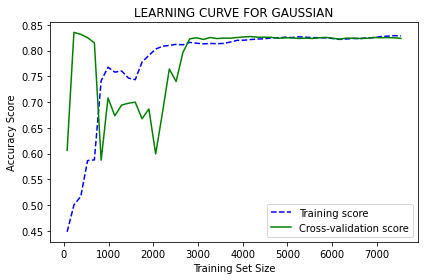

In [39]:

# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(GaussianNB(), dados, resultados, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR GAUSSIAN")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()